In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [7]:
df = df.loc[(df[['x','y','z']]!=0).all(axis=1)]

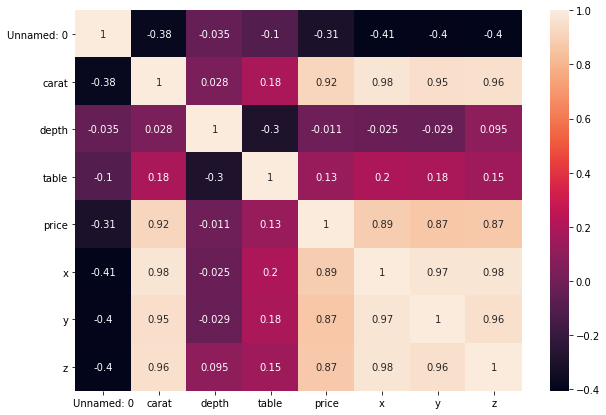

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["float64","int64"])

In [10]:
from sklearn.preprocessing import LabelEncoder

for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [11]:
df_new = pd.concat([df_num,df_cat],axis=1)
df_new

,Unnamed: 0,carat,depth,table,price,x,y,z,cut,color,clarity
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,2,0,2
53936,53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,2
53937,53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,4,0,2
53938,53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,3,4,3


In [12]:
x = df_new.drop(["price","Unnamed: 0"],axis=1)
y = df_new["price"]

In [13]:
x

,carat,depth,table,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,3.89,3.84,2.31,3,1,2
2,0.23,56.9,65.0,4.05,4.07,2.31,1,1,4
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,2,0,2
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,2
53937,0.70,62.8,60.0,5.66,5.68,3.56,4,0,2
53938,0.86,61.0,58.0,6.15,6.12,3.74,3,4,3


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
ss=StandardScaler()
x_train_ss=ss.fit_transform(x_train)
x_test_ss=ss.fit_transform(x_test)

In [15]:
x_train_ss.shape

(37744, 9)

In [16]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(1, input_dim=9)
])

In [17]:
model.compile(optimizer="sgd", loss="mse")

In [18]:
trained_model = model.fit(x_train_ss,y_train,epochs=100)

Epoch 1/100
1180/1180 [==============================] - 2s 959us/step - loss: 2710940.5000
Epoch 2/100
1180/1180 [==============================] - 1s 954us/step - loss: 1969664.2500
Epoch 3/100
1180/1180 [==============================] - 1s 896us/step - loss: 1900943.3750
Epoch 4/100
1180/1180 [==============================] - 1s 911us/step - loss: 1879712.6250
Epoch 5/100
1180/1180 [==============================] - 1s 918us/step - loss: 1874490.3750
Epoch 6/100
1180/1180 [==============================] - 1s 934us/step - loss: 1871455.7500
Epoch 7/100
1180/1180 [==============================] - 1s 888us/step - loss: 1871686.3750
Epoch 8/100
1180/1180 [==============================] - 1s 879us/step - loss: 1871551.0000
Epoch 9/100
1180/1180 [==============================] - 1s 862us/step - loss: 1871962.5000
Epoch 10/100
1180/1180 [==============================] - 1s 905us/step - loss: 1871877.8750
Epoch 11/100
1180/1180 [==============================] - 1s 896us/step - loss:

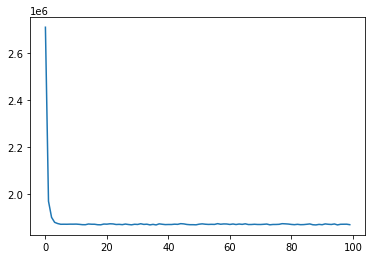

In [19]:
plt.plot(trained_model.history['loss'])

In [20]:
y_pred = model.predict(x_test_ss)

In [21]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

print(f'MAE: {mse(y_test,y_pred)}')
print(f'MSE: {mse(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mse(y_test,y_pred))}')
print(f'r2 score: {r2_score(y_test,y_pred)*100}')

MAE: 1816088.670597868
MSE: 1816088.670597868
RMSE: 1347.623341515673
r2 score: 88.13139340351938
